1. –î–µ—Ä–µ–≤–æ —Ä–µ—à–µ–Ω–∏–π
2. –í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ –Ω–æ—Ä–º–∞–ª–∏–∑–∞—Ü–∏—è
3. Shap values
4. Permitation Feature Importance

In [ ]:
!pip install shap -q

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 540.1/540.1 kB 8.6 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
import shap
import matplotlib.pyplot as plt

In [ ]:
# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö
# data = fetch_california_housing(as_frame=True)
# df = data.frame
# features = data.feature_names
# target = 'MedHouseVal'
# print(f'target = {target}')
# df.head()


In [ ]:
from sklearn.datasets import load_diabetes
data = load_diabetes(as_frame=True)
df = data.frame

features = data.feature_names
target = 'target'
print(f'target = {target}')
df.head()

target = target


age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0

In [ ]:
df.describe()

age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.156131e-01 -1.023071e-01 -7.639450e-02 -1.260971e-01 -1.377672e-01   
25%   -3.035840e-02 -3.511716e-02 -3.949338e-02 -3.324559e-02 -3.317903e-02   
50%   -3.819065e-03 -6.584468e-03 -2.592262e-03 -1.947171e-03 -1.077698e-03   
75%    2.984439e-02  2.931150e-02  3.430886e-02  3.243232e-02  2.791705e-02   
max    1.987880e-01  1.811791e-01  1.852344e-01  1.335973e-01  1.356118e-01   

           target  
count  442.000000  
mean   152.133484  
std     77.093005  
min     25.000000  
25%     87.000000  
50%    140.500000  
75%    211.500000  
max    346.000000

In [ ]:
# –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –¥–∞–Ω–Ω—ã—Ö –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–µ –∏ —Ç–µ—Å—Ç–æ–≤—ã–µ –Ω–∞–±–æ—Ä—ã
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)


In [ ]:
# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ  –¥–µ—Ä–µ–≤–∞ —Ä–µ—à–µ–Ω–∏–π
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [ ]:
# –ü–æ—Å—Ç—Ä–æ–µ–Ω–∏–µ –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


LinearRegression()

In [ ]:
# –û—Ü–µ–Ω–∫–∞ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –≤—Å—Ç—Ä–æ–µ–Ω–Ω—ã–º–∏ –º–µ—Ç–æ–¥–∞–º–∏
# –î–ª—è –¥–µ—Ä–µ–≤–∞ —Ä–µ—à–µ–Ω–∏–π
tree_importances = tree.feature_importances_
tree_importances_df = pd.DataFrame({'Feature': features, 'Importance': tree_importances})
tree_importances_df = tree_importances_df.sort_values(by='Importance', ascending=False)
tree_importances_df

Feature  Importance
2     bmi    0.418232
8      s5    0.155795
4      s1    0.083177
0     age    0.064586
6      s3    0.063936
3      bp    0.062494
9      s6    0.061930
5      s2    0.053389
7      s4    0.029788
1     sex    0.006673

In [ ]:
# –î–ª—è –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
lin_reg_coefs = lin_reg.coef_
lin_reg_coefs_df = pd.DataFrame({'Feature': features, 'Coefficient': lin_reg_coefs})
lin_reg_coefs_df = lin_reg_coefs_df.sort_values(by='Coefficient', ascending=False)
lin_reg_coefs_df


Feature  Coefficient
8      s5   736.198859
2     bmi   542.428759
5      s2   518.062277
3      bp   347.703844
7      s4   275.317902
6      s3   163.419983
9      s6    48.670657
0     age    37.904021
1     sex  -241.964362
4      s1  -931.488846

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lin_reg_st = LinearRegression()
lin_reg_st.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# –î–ª—è –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
lin_reg_coefs = lin_reg_st.coef_
lin_reg_coefs_df = pd.DataFrame({'Feature': features, 'Coefficient': lin_reg_coefs})
lin_reg_coefs_df = lin_reg_coefs_df.sort_values(by='Coefficient', ascending=False)
lin_reg_coefs_df


Feature  Coefficient
8      s5    35.161195
2     bmi    25.607121
5      s2    24.640954
3      bp    16.828872
7      s4    13.138784
6      s3     7.676978
9      s6     2.351364
0     age     1.753758
1     sex   -11.511809
4      s1   -44.448856

**–ú–∏–Ω—É—Å—ã:**

- –í—Å—Ç—Ä–æ–µ–Ω–Ω—ã–µ –º–µ—Ç–æ–¥—ã –¥–∞—é—Ç –æ–±—â—É—é –æ—Ü–µ–Ω–∫—É –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –Ω–∞ —É—Ä–æ–≤–Ω–µ –º–æ–¥–µ–ª–∏, –Ω–æ –Ω–µ –æ–±—ä—è—Å–Ω—è—é—Ç, –∫–∞–∫ –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.

- –í—Å—Ç—Ä–æ–µ–Ω–Ω—ã–µ –º–µ—Ç–æ–¥—ã –Ω–µ —É—á–∏—Ç—ã–≤–∞—é—Ç –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤–∏—è –º–µ–∂–¥—É –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏.

- –û—Ç—Å—É—Ç—Å—Ç–≤–∏–µ —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω–Ω–æ—Å—Ç–∏: –í—Å—Ç—Ä–æ–µ–Ω–Ω—ã–µ –º–µ—Ç–æ–¥—ã –º–æ–≥—É—Ç –Ω–µ –±—ã—Ç—å —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω–Ω—ã–º–∏. –ù–∞–ø—Ä–∏–º–µ—Ä, –µ—Å–ª–∏ –≤ –º–æ–¥–µ–ª—å –¥–æ–±–∞–≤–ª—è–µ—Ç—Å—è –Ω–æ–≤—ã–π –ø—Ä–∏–∑–Ω–∞–∫, —ç—Ç–æ –º–æ–∂–µ—Ç –ø–æ–≤–ª–∏—è—Ç—å –Ω–∞ –≤–∞–∂–Ω–æ—Å—Ç—å —É–∂–µ —Å—É—â–µ—Å—Ç–≤—É—é—â–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, —á—Ç–æ –Ω–µ –≤—Å–µ–≥–¥–∞ –æ–∂–∏–¥–∞–µ–º–æ –∏–ª–∏ —Å–ø—Ä–∞–≤–µ–¥–ª–∏–≤–æ.


# SHAP

–ó–Ω–∞—á–µ–Ω–∏—è SHAP –æ—Å–Ω–æ–≤–∞–Ω—ã –Ω–∞ –∑–Ω–∞—á–µ–Ω–∏—è—Ö –®–µ–ø–ª–∏ –∏–∑ —Ç–µ–æ—Ä–∏–∏ –∫–æ–æ–ø–µ—Ä–∞—Ç–∏–≤–Ω—ã—Ö –∏–≥—Ä. –í –∫–æ–æ–ø–µ—Ä–∞—Ç–∏–≤–Ω—ã—Ö –∏–≥—Ä–∞—Ö –∑–Ω–∞—á–µ–Ω–∏—è –®–µ–ø–ª–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª—è—é—Ç –æ–±—â–∏–π –≤—ã–∏–≥—Ä—ã—à (–∏–ª–∏ —Å—Ç–æ–∏–º–æ—Å—Ç—å) –º–µ–∂–¥—É –∏–≥—Ä–æ–∫–∞–º–∏ (–∏–ª–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞–º–∏) –Ω–∞ –æ—Å–Ω–æ–≤–µ –∏—Ö –≤–∫–ª–∞–¥–∞ –≤ –æ–±—â—É—é –∏–≥—Ä—É. –í –∫–æ–Ω—Ç–µ–∫—Å—Ç–µ –º–∞—à–∏–Ω–Ω–æ–≥–æ –æ–±—É—á–µ–Ω–∏—è, –∏–≥—Ä–æ–∫–∞–º–∏ —è–≤–ª—è—é—Ç—Å—è –ø—Ä–∏–∑–Ω–∞–∫–∏ –º–æ–¥–µ–ª–∏, –∞ –≤—ã–∏–≥—Ä—ã—à–µ–º ‚Äî –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏.

–û—Å–Ω–æ–≤–Ω—ã–µ —à–∞–≥–∏ –≤—ã—á–∏—Å–ª–µ–Ω–∏—è SHAP –∑–Ω–∞—á–µ–Ω–∏–π
- –§–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏–µ –∫–æ–∞–ª–∏—Ü–∏–π –ø—Ä–∏–∑–Ω–∞–∫–æ–≤:

 - –†–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞–µ–º –≤—Å–µ –≤–æ–∑–º–æ–∂–Ω—ã–µ –ø–æ–¥–º–Ω–æ–∂–µ—Å—Ç–≤–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤  –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–≥–æ –æ–±—ä–µ–∫—Ç–∞, –∫–æ—Ç–æ—Ä—ã–µ –º–æ–≥—É—Ç –ø—Ä–∏—Å—É—Ç—Å—Ç–≤–æ–≤–∞—Ç—å –≤ –º–æ–¥–µ–ª–∏.
 - –ù–∞–ø—Ä–∏–º–µ—Ä, –µ—Å–ª–∏ —É –Ω–∞—Å –µ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∏ {A, B, C}, –≤–æ–∑–º–æ–∂–Ω—ã–µ –ø–æ–¥–º–Ω–æ–∂–µ—Å—Ç–≤–∞ –≤–∫–ª—é—á–∞—é—Ç {}, {A}, {B}, {C}, {A, B}, {A, C}, {B, C}, {A, B, C}.

- –†–∞—Å—á–µ—Ç –≤–∫–ª–∞–¥–∞ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞
 - –î–ª—è –∫–∞–∂–¥–æ–≥–æ –ø–æ–¥–º–Ω–æ–∂–µ—Å—Ç–≤–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ S, –≤—ã—á–∏—Å–ª—è–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏
ùëì(ùëÜ)
 - –ó–∞—Ç–µ–º –¥–æ–±–∞–≤–ª—è–µ–º –∏–Ω—Ç–µ—Ä–µ—Å—É—é—â–∏–π –ø—Ä–∏–∑–Ω–∞–∫ j –∫ —ç—Ç–æ–º—É –ø–æ–¥–º–Ω–æ–∂–µ—Å—Ç–≤—É –∏ —Å–Ω–æ–≤–∞ –≤—ã—á–∏—Å–ª—è–µ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏ $f(S \cup \{j\})$.
 - –†–∞–∑–Ω–∏—Ü–∞ –º–µ–∂–¥—É —ç—Ç–∏–º–∏ –¥–≤—É–º—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è–º–∏ $[f(S \cup \{j\}) - f(S)]$  –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç, –Ω–∞—Å–∫–æ–ª—å–∫–æ –∏–∑–º–µ–Ω–∏–ª–æ—Å—å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏ –ø—Ä–∏ –¥–æ–±–∞–≤–ª–µ–Ω–∏–∏ –ø—Ä–∏–∑–Ω–∞–∫–∞ j –∫ –ø–æ–¥–º–Ω–æ–∂–µ—Å—Ç–≤—É S. –≠—Ç–æ –∏ –µ—Å—Ç—å –≤–∫–ª–∞–¥ –ø—Ä–∏–∑–Ω–∞–∫–∞ j –≤ –¥–∞–Ω–Ω–æ–º –ø–æ–¥–º–Ω–æ–∂–µ—Å—Ç–≤–µ.

- –í–∑–≤–µ—à–∏–≤–∞–Ω–∏–µ –≤–∫–ª–∞–¥–æ–≤:

–ü–æ—Å–∫–æ–ª—å–∫—É –≤–∫–ª–∞–¥ –ø—Ä–∏–∑–Ω–∞–∫–∞ –º–æ–∂–µ—Ç –≤–∞—Ä—å–∏—Ä–æ–≤–∞—Ç—å—Å—è –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –¥—Ä—É–≥–∏—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤, –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —É—Å—Ä–µ–¥–Ω–∏—Ç—å –µ–≥–æ –≤–∫–ª–∞–¥ –ø–æ –≤—Å–µ–º –≤–æ–∑–º–æ–∂–Ω—ã–º –ø–æ–¥–º–Ω–æ–∂–µ—Å—Ç–≤–∞–º.
–ö–∞–∂–¥–æ–µ –ø–æ–¥–º–Ω–æ–∂–µ—Å—Ç–≤–æ –≤–∑–≤–µ—à–∏–≤–∞–µ—Ç—Å—è –ø–æ —Ñ–æ—Ä–º—É–ª–µ:
$ \frac{|S|! \cdot (|N| - |S| - 1)!}{|N|!} $ , –≥–¥–µ

$ ‚à£S‚à£ $ ‚Äî –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤ –ø–æ–¥–º–Ω–æ–∂–µ—Å—Ç–≤–µ, –∞
$ ‚à£N‚à£ $ ‚Äî –æ–±—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.

 - –í—ã—á–∏—Å–ª–µ–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è SHAP:

  - –ó–Ω–∞—á–µ–Ω–∏–µ SHAP –¥–ª—è –ø—Ä–∏–∑–Ω–∞–∫–∞ j –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è –∫–∞–∫: $phi_j = \sum_{S \subseteq N \setminus \{j\}} \frac{|S|! \cdot (|N| - |S| - 1)!}{|N|!} [ f(S \cup \{j\}) - f(S) ] $



–ó–Ω–∞—á–µ–Ω–∏–µ SHAP –¥–ª—è –ø—Ä–∏–∑–Ω–∞–∫–∞ j –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç —Å–æ–±–æ–π –≤–∫–ª–∞–¥ —ç—Ç–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ –≤ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏ –¥–ª—è –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–≥–æ –ø—Ä–∏–º–µ—Ä–∞. –û–Ω–æ –ø–æ–∑–≤–æ–ª—è–µ—Ç –ø–æ–Ω—è—Ç—å, –Ω–∞—Å–∫–æ–ª—å–∫–æ –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –∏–∑–º–µ–Ω—è–µ—Ç –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏ –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –±–∞–∑–æ–≤—ã–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ–º, –µ—Å–ª–∏ –±—ã —ç—Ç–æ—Ç –ø—Ä–∏–∑–Ω–∞–∫ –Ω–µ –±—ã–ª –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω.



- SHAP-–∑–Ω–∞—á–µ–Ω–∏—è —Ä–∞—Å—Å—á–∏—Ç—ã–≤–∞—é—Ç—Å—è –¥–ª—è –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–≥–æ –æ–±—ä–µ–∫—Ç–∞.
- –û–Ω–∏ –æ–±—ä—è—Å–Ω—è—é—Ç —Ä–∞–∑–Ω–∏—Ü—É –º–µ–∂–¥—É –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ–º –¥–ª—è —ç—Ç–æ–≥–æ –æ–±—ä–µ–∫—Ç–∞ –∏ —Å—Ä–µ–¥–Ω–∏–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ–º.
- –í–∑–≤–µ—à–∏–≤–∞–Ω–∏–µ –∏—Å—Ö–æ–¥–∏—Ç –∏–∑ –ø—Ä–∏–Ω—Ü–∏–ø–æ–≤ —Ç–µ–æ—Ä–∏–∏ –∫–æ–æ–ø–µ—Ä–∞—Ç–∏–≤–Ω—ã—Ö –∏–≥—Ä.


In [ ]:
X_test.describe()

age        sex        bmi         bp         s1         s2  \
count  89.000000  89.000000  89.000000  89.000000  89.000000  89.000000   
mean   -0.005719  -0.000729  -0.006884  -0.004678   0.002203   0.003197   
std     0.052296   0.047782   0.048619   0.044035   0.047155   0.047705   
min    -0.107226  -0.044642  -0.090275  -0.102070  -0.126781  -0.106845   
25%    -0.045472  -0.044642  -0.042852  -0.033213  -0.027712  -0.024800   
50%    -0.001882  -0.044642  -0.018062  -0.015999  -0.002945  -0.001001   
75%     0.038076   0.050680   0.030440   0.028758   0.034206   0.036577   
max     0.110727   0.050680   0.170555   0.087287   0.125019   0.125198   

              s3         s4         s5         s6  
count  89.000000  89.000000  89.000000  89.000000  
mean    0.003923  -0.001494  -0.004823  -0.007500  
std     0.049917   0.047173   0.046733   0.043929  
min    -0.076536  -0.076395  -0.096435  -0.088062  
25%    -0.036038  -0.039493  -0.038460  -0.042499  
50%     0.000779  -0.002592  -0.007977  -0.009362  
75%     0.037595   0.034309   0.030564   0.019633  
max     0.140681   0.141322   0.098648   0.135612

In [ ]:
%%time
explainer_lin = shap.Explainer(lin_reg.predict, X_test)
# –≤—ã—á–∏—Å–ª—è—é—Ç—Å—è –∑–Ω–∞—á–µ–Ω–∏—è SHAP –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –ø—Ä–∏–º–µ—Ä–∞ –≤ X_test
shap_values_lin = explainer_lin(X_test)

ExactExplainer explainer: 90it [00:18,  4.93it/s]                        

CPU times: user 8.94 s, sys: 2.86 s, total: 11.8 s
Wall time: 18.1 s


In [ ]:
# shap_values_lin

`shap.plots.waterfall` ‚Äî —ç—Ç–æ —Ñ—É–Ω–∫—Ü–∏—è, –∫–æ—Ç–æ—Ä–∞—è —Å–æ–∑–¥–∞–µ—Ç –≥—Ä–∞—Ñ–∏–∫ –≤–æ–¥–æ–ø–∞–¥–∞, –æ—Ç–æ–±—Ä–∞–∂–∞—é—â–∏–π –∫–∞–∫ —Ä–∞–∑–ª–∏—á–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –≤–ª–∏—è—é—Ç –Ω–∞ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏ –¥–ª—è –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–≥–æ –ø—Ä–∏–º–µ—Ä–∞.

`shap_values_lin[i]` ‚Äî —ç—Ç–æ –æ–±—ä–µ–∫—Ç –∑–Ω–∞—á–µ–Ω–∏–π SHAP –¥–ª—è i-–≥–æ –ø—Ä–∏–º–µ—Ä–∞. –û–Ω —Å–æ–¥–µ—Ä–∂–∏—Ç –∑–Ω–∞—á–µ–Ω–∏—è SHAP –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞, –∫–æ—Ç–æ—Ä—ã–µ –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç, –Ω–∞—Å–∫–æ–ª—å–∫–æ –∫–∞–∂–¥—ã–π –ø—Ä–∏–∑–Ω–∞–∫ –∏–∑–º–µ–Ω—è–µ—Ç –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏ –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –±–∞–∑–æ–≤—ã–º —É—Ä–æ–≤–Ω–µ–º.

`max_display=14` ‚Äî —ç—Ç–æ—Ç –ø–∞—Ä–∞–º–µ—Ç—Ä –æ–≥—Ä–∞–Ω–∏—á–∏–≤–∞–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–æ–±—Ä–∞–∂–∞–µ–º—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–µ. –í –¥–∞–Ω–Ω–æ–º —Å–ª—É—á–∞–µ, –±—É–¥–µ—Ç –æ—Ç–æ–±—Ä–∞–∂–∞—Ç—å—Å—è –º–∞–∫—Å–∏–º—É–º 14 –Ω–∞–∏–±–æ–ª–µ–µ –∑–Ω–∞—á–∏–º—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤.

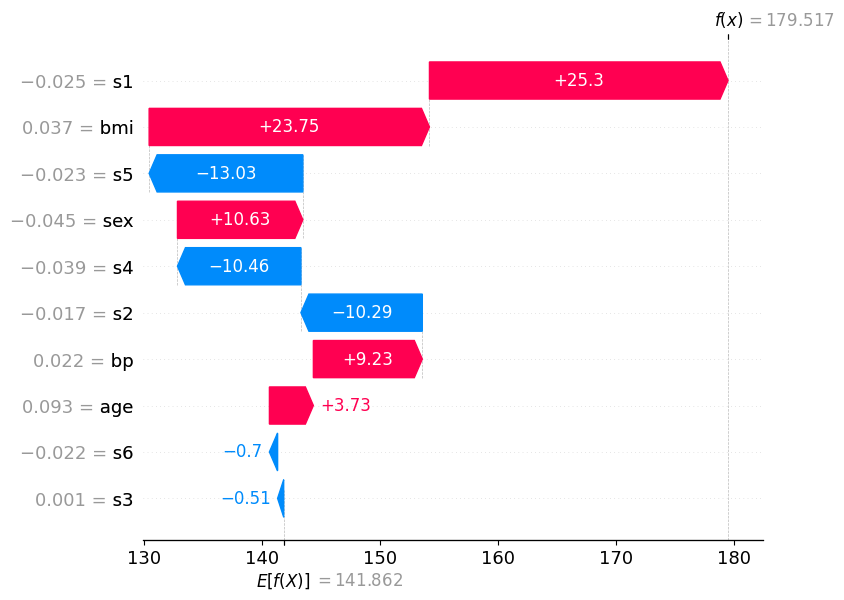

In [ ]:
i = 1
shap.plots.waterfall(shap_values_lin[i], max_display=14)

In [ ]:
141.862-0.51-0.7+3.73+9.23-10.29-10.46+10.63-13.03+23.75+25.3

179.512

In [ ]:
pred_test = lin_reg.predict(X_test)
np.mean(pred_test)

141.86244052379863

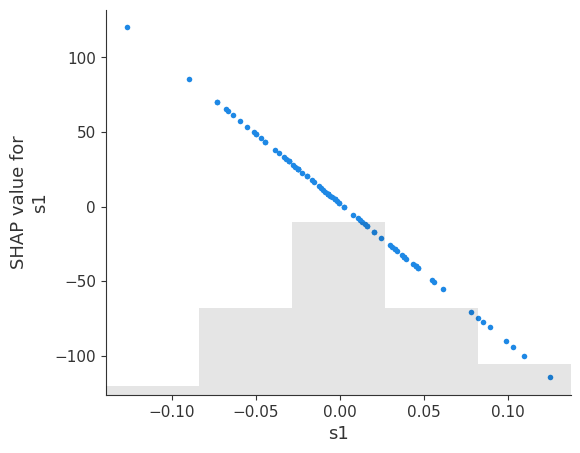

In [ ]:
# –ì—Ä–∞—Ñ–∏–∫ —Ä–∞—Å—Å–µ—è–Ω–∏—è –ø–æ–∑–≤–æ–ª—è–µ—Ç –≤–∏–∑—É–∞–ª—å–Ω–æ –æ—Ü–µ–Ω–∏—Ç—å,
# –∫–∞–∫ –≤–µ–ª–∏—á–∏–Ω–∞ –ø—Ä–∏–∑–Ω–∞–∫–∞ "s1" —Å–æ–æ—Ç–Ω–æ—Å–∏—Ç—Å—è —Å –µ–≥–æ –≤–ª–∏—è–Ω–∏–µ–º –Ω–∞ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏.
shap.plots.scatter(shap_values_lin[:, "s1"])

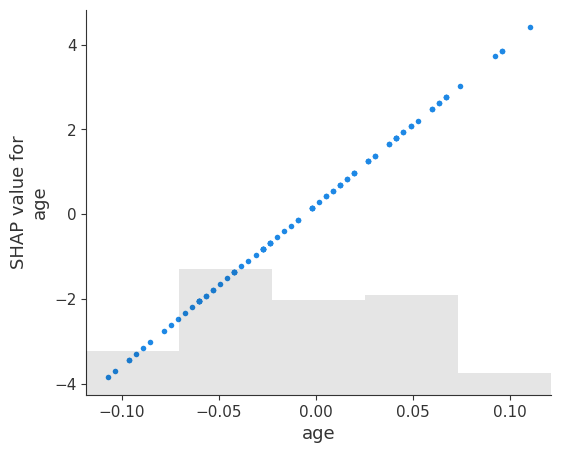

In [ ]:
shap.plots.scatter(shap_values_lin[:, "age"])

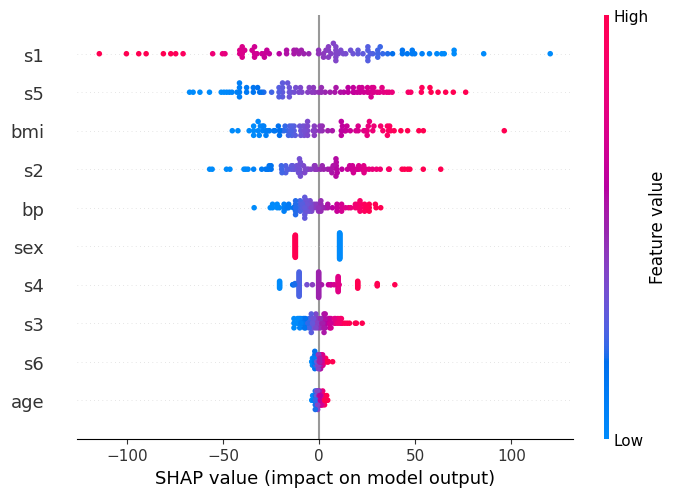

In [ ]:
# —Ü–≤–µ—Ç —Ç–æ—á–µ–∫ –æ—Ç—Ä–∞–∂–∞–µ—Ç –∑–Ω–∞—á–µ–Ω–∏—è —Å–∞–º–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞
# –û—Å—å X: –ó–Ω–∞—á–µ–Ω–∏—è SHAP –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞. –ü–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –ø–æ–∫–∞–∑—ã–≤–∞—é—Ç,
# –Ω–∞—Å–∫–æ–ª—å–∫–æ –ø—Ä–∏–∑–Ω–∞–∫ —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏ –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –±–∞–∑–æ–≤—ã–º —É—Ä–æ–≤–Ω–µ–º,
#  –∞ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–µ ‚Äî –Ω–∞—Å–∫–æ–ª—å–∫–æ —É–º–µ–Ω—å—à–∞–µ—Ç
shap.plots.beeswarm(shap_values_lin)

In [ ]:
explainer_tree = shap.Explainer(tree.predict, X_test)
shap_values_tree = explainer_tree(X_test)

In [ ]:
pred_tree = tree.predict(X_test)

In [ ]:
np.mean(pred_tree)

144.2808988764045

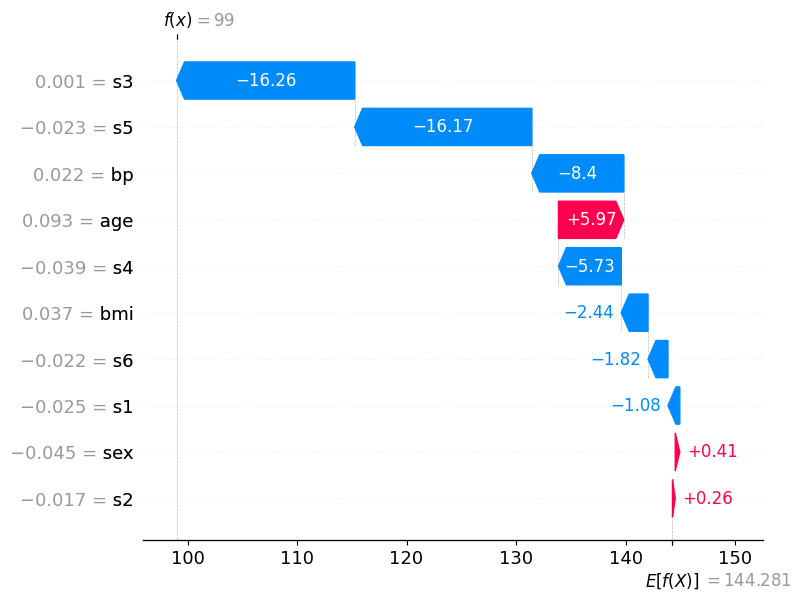

In [ ]:
i = 1
shap.plots.waterfall(shap_values_tree[i], max_display=14)

–§—É–Ω–∫—Ü–∏—è shap.plots.beeswarm(shap_values_tree) –∏–∑ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ SHAP –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –¥–ª—è –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –∑–Ω–∞—á–µ–Ω–∏–π SHAP –≤ –≤–∏–¥–µ –ø—á–µ–ª–∏–Ω–æ–≥–æ —Ä–æ—è (beeswarm plot).

–ù–∞ –¥–∞–Ω–Ω–æ–º –≥—Ä–∞—Ñ–∏–∫–µ  –∫–∞–∂–¥–∞—è —Ç–æ—á–∫–∞ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç –æ–¥–∏–Ω –ø—Ä–∏–º–µ—Ä –¥–∞–Ω–Ω—ã—Ö, —Ä–∞—Å–ø–æ–ª–æ–∂–µ–Ω–∏–µ —Ç–æ—á–µ–∫ –ø–æ –æ—Å–∏ X –æ—Ç—Ä–∞–∂–∞–µ—Ç —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ SHAP –¥–ª—è –¥–∞–Ω–Ω–æ–≥–æ –ø—Ä–∏–º–µ—Ä–∞. –ß–µ–º –¥–∞–ª—å—à–µ —Ç–æ—á–∫–∞ –Ω–∞—Ö–æ–¥–∏—Ç—Å—è –≤–ø—Ä–∞–≤–æ, —Ç–µ–º –±–æ–ª—å—à–µ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–π –≤–∫–ª–∞–¥ –≤ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏ –æ–Ω–∞ –≤–Ω–æ—Å–∏—Ç, –∏ –Ω–∞–æ–±–æ—Ä–æ—Ç.


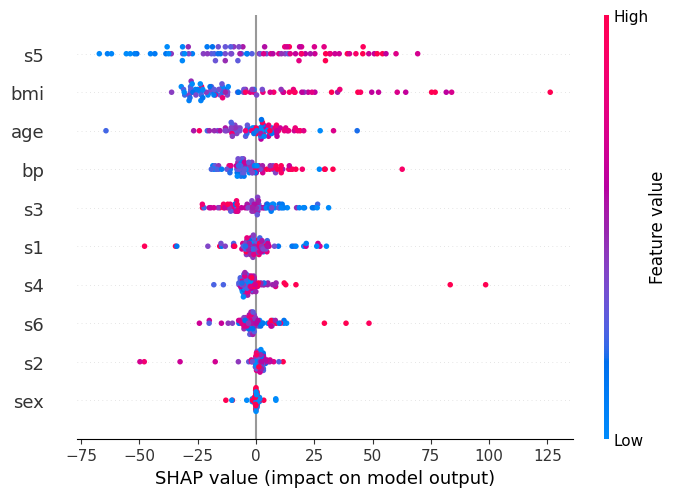

In [ ]:
shap.plots.beeswarm(shap_values_tree)

–≥—Ä–∞—Ñ–∏–∫ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç –≤–∫–ª–∞–¥ –∫–∞–∂–¥–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ –≤ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏. –î–ª—è –∫–∞–∂–¥–æ–≥–æ –ø—Ä–∏–∑–Ω–∞–∫–∞ –≤—ã–≤–æ–¥–∏—Ç—Å—è –µ–≥–æ —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –∞–±—Å–æ–ª—é—Ç–Ω–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è SHAP –ø–æ –≤—Å–µ–º –ø—Ä–∏–º–µ—Ä–∞–º –¥–∞–Ω–Ω—ã—Ö.

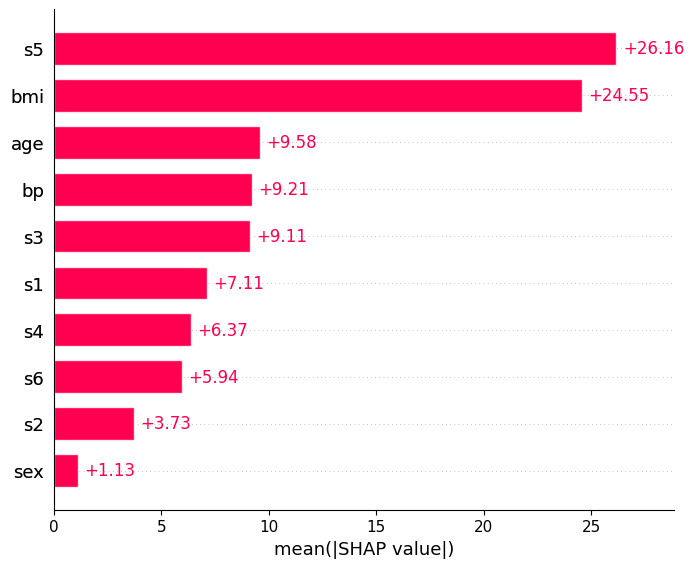

In [ ]:
shap.plots.bar(shap_values_tree)

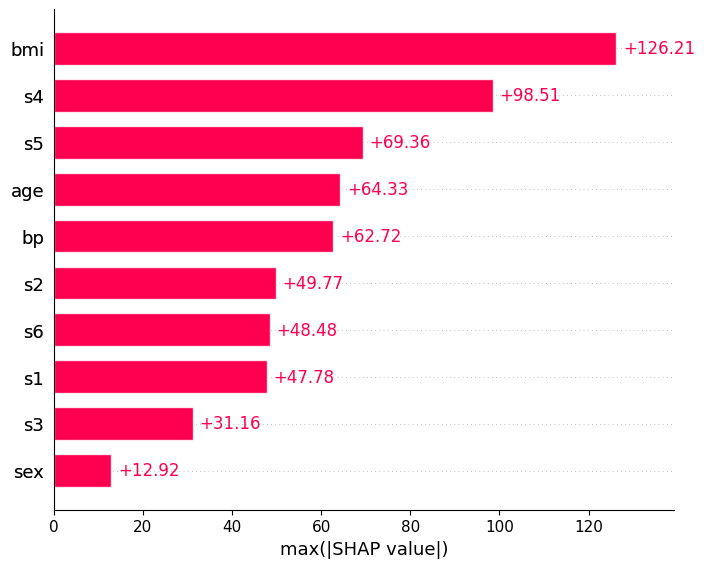

In [ ]:
shap.plots.bar(shap_values_tree.abs.max(0))

# Permitation Feature Importance


permutation_importance –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –≤ –º–æ–¥–µ–ª–∏ –ø—É—Ç–µ–º –ø–µ—Ä–µ–º–µ—à–∏–≤–∞–Ω–∏—è –∑–Ω–∞—á–µ–Ω–∏–π –ø—Ä–∏–∑–Ω–∞–∫–∞ –∏ –∏–∑–º–µ—Ä–µ–Ω–∏—è –∏–∑–º–µ–Ω–µ–Ω–∏–π –≤ –∫–∞—á–µ—Å—Ç–≤–µ –º–æ–¥–µ–ª–∏.

n_repeats: –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø–µ—Ä–µ—Å—Ç–∞–Ω–æ–≤–æ–∫ –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ (—á–µ–º –±–æ–ª—å—à–µ, —Ç–µ–º —Ç–æ—á–Ω–µ–µ, –Ω–æ –º–µ–¥–ª–µ–Ω–Ω–µ–µ).

In [ ]:
# –û—Ü–µ–Ω–∫–∞ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –º–µ—Ç–æ–¥–æ–º Permutation Feature Importance
# –î–ª—è –¥–µ—Ä–µ–≤–∞ —Ä–µ—à–µ–Ω–∏–π
perm_importance_tree = permutation_importance(tree, X_test, y_test, n_repeats=10, random_state=42)
perm_importance_tree_df = pd.DataFrame({'Feature': features, 'Importance': perm_importance_tree.importances_mean})
perm_importance_tree_df = perm_importance_tree_df.sort_values(by='Importance', ascending=False)

perm_importance_tree_df


Feature  Importance
8      s5    0.310955
2     bmi    0.223325
9      s6    0.150267
3      bp    0.103333
5      s2    0.097951
4      s1    0.088385
6      s3    0.055952
0     age    0.013922
1     sex    0.000136
7      s4   -0.035228

In [ ]:
perm_importance_tree

{'importances_mean': array([ 1.39219633e-02,  1.36363008e-04,  2.23325070e-01,  1.03333470e-01,
         8.83854970e-02,  9.79514786e-02,  5.59523083e-02, -3.52276760e-02,
         3.10954951e-01,  1.50267369e-01]),
 'importances_std': array([0.08284167, 0.01092303, 0.09826178, 0.06276669, 0.07276014,
        0.02796016, 0.05200785, 0.03357482, 0.08755374, 0.08003579]),
 'importances': array([[ 0.04326716,  0.03321065,  0.00182807, -0.21413022,  0.02263032,
          0.04805152,  0.09635542, -0.02244794,  0.04766343,  0.08279122],
        [ 0.01878119, -0.01357056,  0.01576764, -0.0121115 ,  0.00045596,
         -0.00608226, -0.00959419,  0.00512369,  0.00844687, -0.00585322],
        [ 0.28462332,  0.25548659,  0.10648615,  0.20633441,  0.37567054,
          0.32285586,  0.20775318,  0.08547819,  0.08525127,  0.3033112 ],
        [-0.03068062,  0.07949348,  0.10109737,  0.20452543,  0.07254597,
          0.19380089,  0.09626635,  0.12762348,  0.11289712,  0.07576524],
        [ 0.1139

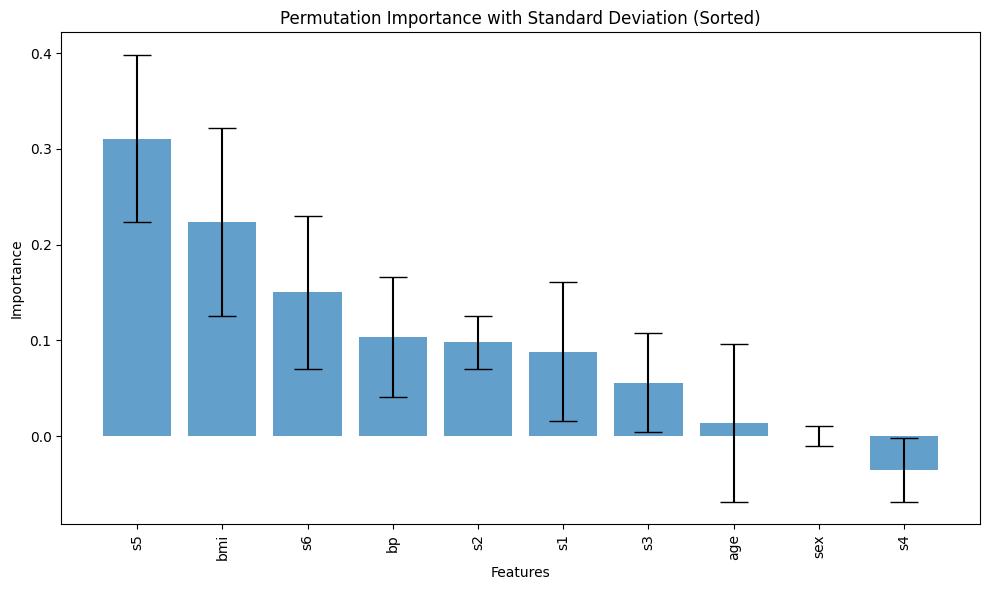

In [ ]:
# –°—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
importances_mean = perm_importance_tree.importances_mean

# –î–∏—Å–ø–µ—Ä—Å–∏–∏ –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
importances_std = perm_importance_tree.importances_std


# –°–æ—Ä—Ç–∏—Ä–æ–≤–∫–∞ –∑–Ω–∞—á–µ–Ω–∏–π –≤–∞–∂–Ω–æ—Å—Ç–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏ –∏—Ö –¥–∏—Å–ø–µ—Ä—Å–∏–∏
sorted_indices = np.argsort(importances_mean)[::-1]
importances_mean_sorted = importances_mean[sorted_indices]
importances_std_sorted = importances_std[sorted_indices]
feature_names_sorted = np.array(features)[sorted_indices]

# –°–æ–∑–¥–∞–µ–º –≥—Ä–∞—Ñ–∏–∫
plt.figure(figsize=(10, 6))

# –°—Ç–æ–ª–±—Ü–æ–≤–∞—è –¥–∏–∞–≥—Ä–∞–º–º–∞ –¥–ª—è –æ—Ç—Å–æ—Ä—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π
plt.bar(range(len(importances_mean_sorted)), importances_mean_sorted, yerr=importances_std_sorted, align='center', alpha=0.7, ecolor='black', capsize=10)

# –î–æ–±–∞–≤–ª—è–µ–º –ø–æ–¥–ø–∏—Å–∏ –∫ –æ—Å—è–º
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Permutation Importance with Standard Deviation (Sorted)')

# –î–æ–±–∞–≤–ª—è–µ–º –ø–æ–¥–ø–∏—Å–∏ –¥–ª—è –æ—Å–∏ x —Å –Ω–∞–∑–≤–∞–Ω–∏—è–º–∏ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
plt.xticks(range(len(importances_mean_sorted)), feature_names_sorted, rotation='vertical')

# –û—Ç–æ–±—Ä–∞–∂–∞–µ–º –≥—Ä–∞—Ñ–∏–∫
plt.tight_layout()
plt.show()

In [ ]:
# –î–ª—è –ª–∏–Ω–µ–π–Ω–æ–π —Ä–µ–≥—Ä–µ—Å—Å–∏–∏
perm_importance_lin_reg = permutation_importance(lin_reg, X_test, y_test, n_repeats=10, random_state=42)
perm_importance_lin_reg_df = pd.DataFrame({'Feature': features, 'Importance': perm_importance_lin_reg.importances_mean})
perm_importance_lin_reg_df = perm_importance_lin_reg_df.sort_values(by='Importance', ascending=False)

perm_importance_lin_reg_df

Feature  Importance
4      s1    0.646898
8      s5    0.476232
5      s2    0.245516
2     bmi    0.208983
1     sex    0.084489
6      s3    0.056400
3      bp    0.044422
7      s4    0.031633
9      s6    0.003071
0     age   -0.004572